# RoadSafe Analytics: Road Accidents - Exploratory Data Analysis (EDA)

## Project Statement
**The goal of this project is to analyze a large dataset of road accidents to uncover trends, patterns, and key factors contributing to accident severity.** 




# Milestone 1: Dataset Setup & Preprocessing

This milestone is about getting started with the project.

We clearly define our project objectives: analyzing US accident data to uncover safety insights.

Then, we acquire the dataset, load it into Python, and perform an initial exploration of its structure, size, datatypes, and missing values.

After understanding the dataset, we move to data cleaning and preprocessing:

Remove columns with too many missing values.

Convert timestamps into meaningful features like Hour, Weekday, and Month.

Detect and handle duplicate records.

Identify and remove/handle outliers in numerical features (e.g., visibility, temperature).

Encode categorical variables where necessary for analysis.

By the end of this milestone, we have a clean and structured dataset ready for analysis.

## Week 1: Project Initialization and Dataset Acquisition

### 1. Load the Dataset

In [2]:
import pandas as pd

file_path = r"C:\Users\sanas\Desktop\USRoadAccidents\Us_Accidents.csv"

df = pd.read_csv(file_path)

### 2. Check Dataset Structure

In [3]:
df.shape

(7728394, 46)

In [4]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

### 3. Summary Statistics

In [11]:
# Summary of numerical columns (mean, min, max, std)
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [12]:
# Distribution of categorical columns (e.g., Severity, Weather)
df['Severity'].value_counts()
df['Weather_Condition'].value_counts().head(10)

Weather_Condition
Fair                2560802
Mostly Cloudy       1016195
Cloudy               817082
Clear                808743
Partly Cloudy        698972
Overcast             382866
Light Rain           352957
Scattered Clouds     204829
Light Snow           128680
Fog                   99238
Name: count, dtype: int64

In [13]:
cities_by_accidents = df.City.value_counts()
cities_by_accidents

City
Miami          186917
Houston        169609
Los Angeles    156491
Charlotte      138652
Dallas         130939
                ...  
Saint Croix         1
Masardis            1
Okaton              1
Wasta               1
Adell               1
Name: count, Length: 13678, dtype: int64

<Axes: ylabel='City'>

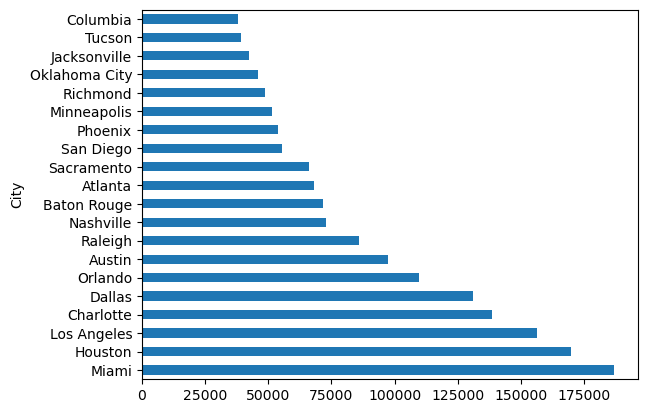

In [15]:
cities_by_accidents[:20].plot(kind = "barh")

### 4. Check missing values

In [9]:
# Count missing values in each column
df.isnull().sum()

# # Percentage of missing values per column
# (df.isnull().sum() / len(df)) * 100

# # Check if there are ANY missing values at all
# df.isnull().values.any() #missing values found

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [8]:
# Sort percentage of issing Values by Column
missing_percentage = df.isna().sum().sort_values(ascending=False) / len(df)  
missing_percentage

End_Lng                  4.402935e-01
End_Lat                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Sunrise_Sunset           3.007869e-03
Civil_Twilight           3.007869e-03
Astronomical_Twilight    3.007869e-03
Nautical_Twilight        3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
ID                       0.000000e+00
Distance(mi)             0.000000e+00
Start_Lng                0.000000e+00
Source                   0.000000e+00
Severity    

<Axes: >

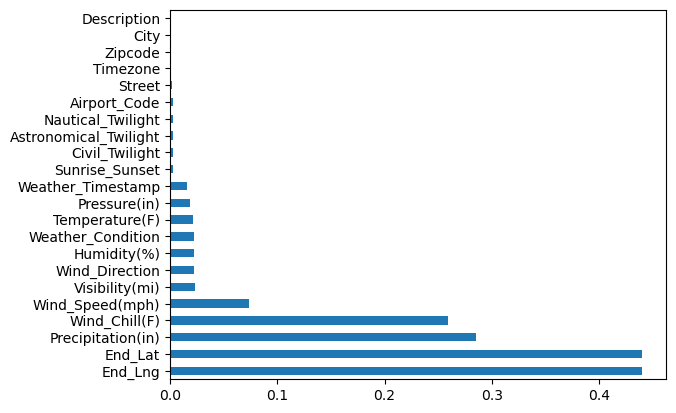

In [11]:
missing_percentage[missing_percentage != 0].plot(kind='barh')

### 5. Check Duplicate Rows


In [15]:
# Count duplicate rows
df.duplicated().sum()

np.int64(0)

In [16]:
# Show only the duplicate rows
duplicates = df[df.duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [ID, Source, Severity, Start_Time, End_Time, Start_Lat, Start_Lng, End_Lat, End_Lng, Distance(mi), Description, Street, City, County, State, Zipcode, Country, Timezone, Airport_Code, Weather_Timestamp, Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Direction, Wind_Speed(mph), Precipitation(in), Weather_Condition, Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop, Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight]
Index: []

[0 rows x 46 columns]


## Week 2: Data Cleaning and Preprocessing

## Remove duplicate and missing values

In [18]:
# Drop rows with missing values
df.dropna(inplace=True)

In [19]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [20]:
df.isnull().values.any() #missing values removed

np.False_

In [21]:
df.duplicated().sum() #duplicates not found

np.int64(0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 45 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   DateTime               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Street                 object        
 11  City                   object        
 12  County                 object        
 13  State                  object        
 14  Zipcode                object        
 15  Country                object        
 16  Timezone               object        
 17  Airport_Code           object        
 18  Weather_Timestamp     

## Convert Date-Time columns into proper formats

In [16]:
# Convert Start_Time to datetime
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")

# Rename Start_Time to DateTime
df = df.rename(columns={"Start_Time": "DateTime"})

# Drop End_Time column
df = df.drop(columns=["End_Time"])

## Create new features like "Hour", "Weekday", or "Month" from timestamp.

In [18]:
# Extract features from Start_Time
# df["Start_Hour"] = df["Start_Time"].dt.hour
df["Hour"] = df["DateTime"].dt.hour
# df["DayOfMonth"] = df["Start_Time"].dt.day
df["Weekday"] = df["DateTime"].dt.day_name()   # Monday, Tuesday, etc.
df["Month"] = df["DateTime"].dt.month
df["Year"] = df["DateTime"].dt.year
df["Date"] = df["DateTime"].dt.date

#Convert Start_Lat into Latitude and Longitude
df["Latitude"] = df["Start_Lat"]
df["Longitude"] = df["Start_Lng"]

#Dropped excess columns start lat start lng end lat end lng
df = df.drop(columns=["Start_Lat","Start_Lng","End_Lat","End_Lng"])

# # You can also do the same for End_Time or Weather_Timestamp if useful
# df["End_Hour"] = df["End_Time"].dt.hour
# df["Weather_Month"] = df["Weather_Timestamp"].dt.month

In [20]:
df

,ID,Source,Severity,DateTime,Distance(mi),Description,Street,City,County,State,...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Weekday,Month,Year,Date,Latitude,Longitude
0,A-1,Source2,3,2016-02-08 05:46:00,0.010,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,...,Night,Night,Night,5.0,Monday,2.0,2016.0,2016-02-08,39.865147,-84.058723
1,A-2,Source2,2,2016-02-08 06:07:59,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,...,Night,Night,Day,6.0,Monday,2.0,2016.0,2016-02-08,39.928059,-82.831184
2,A-3,Source2,2,2016-02-08 06:49:27,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,...,Night,Day,Day,6.0,Monday,2.0,2016.0,2016-02-08,39.063148,-84.032608
3,A-4,Source2,3,2016-02-08 07:23:34,0.010,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,...,Day,Day,Day,7.0,Monday,2.0,2016.0,2016-02-08,39.747753,-84.205582
4,A-5,Source2,2,2016-02-08 07:39:07,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,...,Day,Day,Day,7.0,Monday,2.0,2016.0,2016-02-08,39.627781,-84.188354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,0.543,At Market St - Accident.,Pomona Fwy E,Riverside,Riverside,CA,...,Day,Day,Day,18.0,Friday,8.0,2019.0,2019-08-23,34.002480,-117.379360
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,San Diego,San Diego,CA,...,Day,Day,Day,19.0,Friday,8.0,2019.0,2019-08-23,32.766960,-117.148060
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,Orange,Orange,CA,...,Day,Day,Day,19.0,Friday,8.0,2019.0,2019-08-23,33.775450,-117.847790
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,Culver City,Los Angeles,CA,...,Day,Day,Day,19.0,Friday,8.0,2019.0,2019-08-23,33.992460,-118.403020


## Encode categorical variables if needed and handle outliers and duplicate entries

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Categorical columns we want to encode
categorical_cols = [
    'Country', 'State', 'City', 'County',
    'Timezone', 'Airport_Code',
    'Weather_Condition', 'Wind_Direction',
    'Sunrise_Sunset', 'Civil_Twilight', 
    'Nautical_Twilight', 'Astronomical_Twilight',
    'Weekday'
]

# Rule of thumb:
# - If a column has few unique values (<= threshold) → One-Hot Encoding
# - If it has many unique values (> threshold) → Label Encoding
threshold = 20  

# Keep a dictionary of encoders for later use
label_encoders = {}

for col in categorical_cols:
    # Skip if column is missing in the dataset
    if col not in df.columns:
        continue
    
    unique_vals = df[col].nunique()
    
    if unique_vals <= threshold:
        # One-Hot Encoding for low-cardinality categorical features
        dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df = pd.concat([df, dummies], axis=1)  # add dummy columns
        df.drop(col, axis=1, inplace=True)     # drop original column
    else:
        # Label Encoding for high-cardinality categorical features
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le   # save encoder for future transformations

# Quick check of processed data
print(df.head())


    ID   Source  Severity            DateTime  Distance(mi)  \
0  A-1  Source2         3 2016-02-08 05:46:00          0.01   
1  A-2  Source2         2 2016-02-08 06:07:59          0.01   
2  A-3  Source2         2 2016-02-08 06:49:27          0.01   
3  A-4  Source2         3 2016-02-08 07:23:34          0.01   
4  A-5  Source2         2 2016-02-08 07:39:07          0.01   

                                         Description  \
0  Right lane blocked due to accident on I-70 Eas...   
1  Accident on Brice Rd at Tussing Rd. Expect del...   
2  Accident on OH-32 State Route 32 Westbound at ...   
3  Accident on I-75 Southbound at Exits 52 52B US...   
4  Accident on McEwen Rd at OH-725 Miamisburg Cen...   

                      Street  City  County  State  ... Sunrise_Sunset_Night  \
0                     I-70 E  5785     141     27  ...                 True   
1                   Brice Rd   220    1422     27  ...                 True   
2             State Route 32  3722    1147     

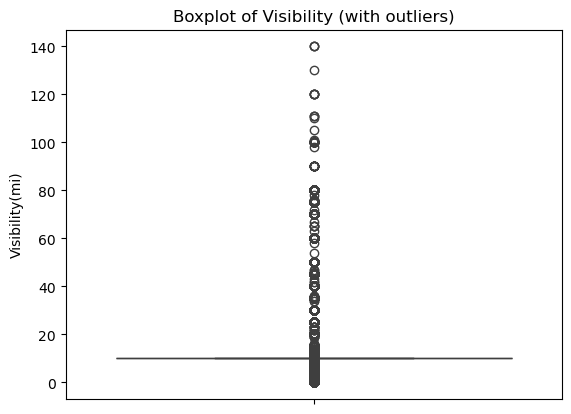

In [3]:
# 1. Identify numeric columns for outlier detection

# We don’t check categorical columns like Country, Road Type, Accident Cause. Focus on continuous numeric features:
# Numerical features (continuous, usable for outlier detection, scaling, etc.)

# [Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in)

# Visibility(mi),Wind_Speed(mph),Precipitation(in), Hour,Month,Year, Latitude,Longitude]

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=df['Visibility(mi)'])
plt.title('Boxplot of Visibility (with outliers)')
plt.show()

In [4]:
# # Count duplicates
# print("Duplicate rows:", df.duplicated().sum())

# # Drop duplicates
# df = df.drop_duplicates()

#there is no duplicate hence not needed

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)   # 25% value
    Q3 = df[column].quantile(0.75)   # 75% value
    IQR = Q3 - Q1                    # range in middle 50%
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Keep only values within range
    cleaned_df = df[(df[column] >= lower) & (df[column] <= upper)]
    
    # Plot cleaned column
    sns.boxplot(y=cleaned_df[column])
    plt.title(f'Boxplot of {column} (without outliers)')
    plt.show()
    
    return cleaned_df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

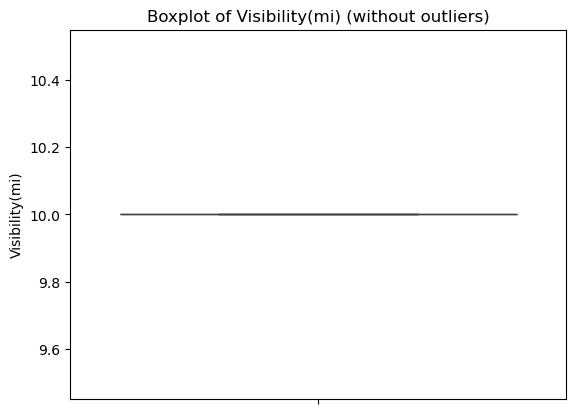

Before: (7728394, 46)
After: (6070231, 46)


In [5]:
df_no_outliers = remove_outliers(df, 'Visibility(mi)')

print("Before:", df.shape)
print("After:", df_no_outliers.shape)

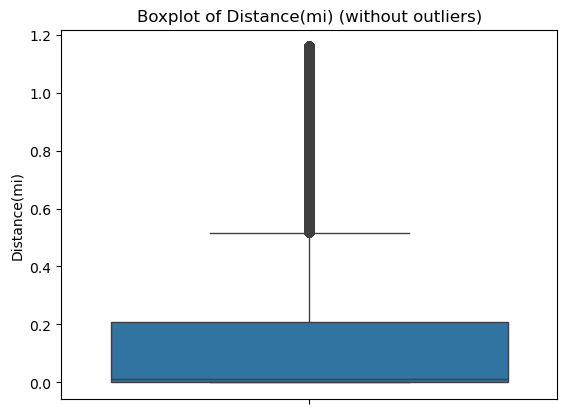

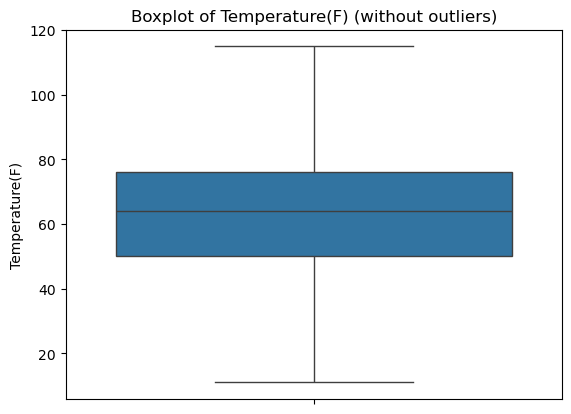

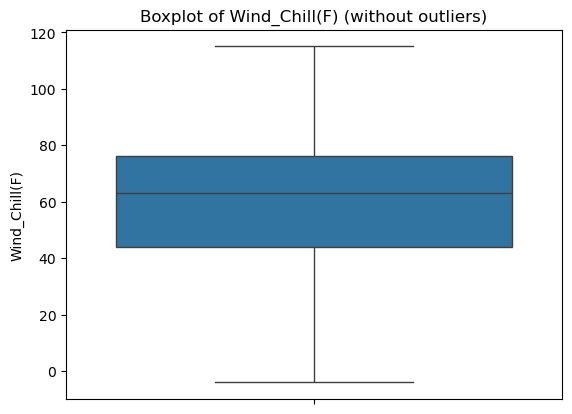

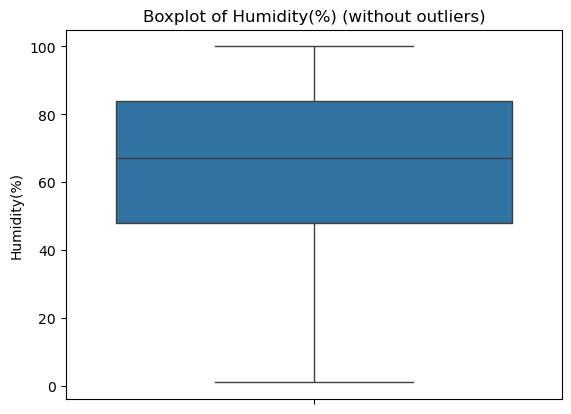

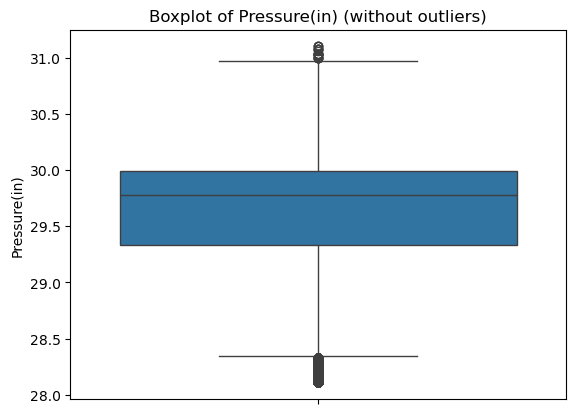

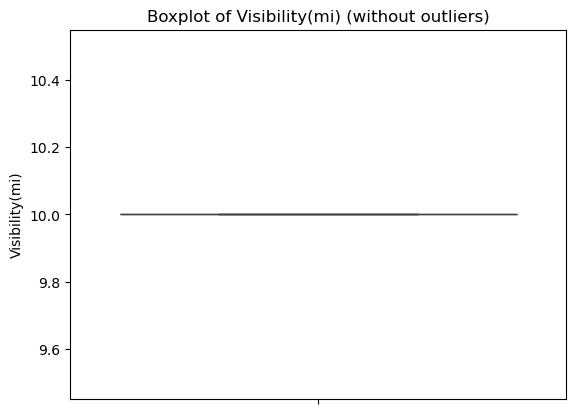

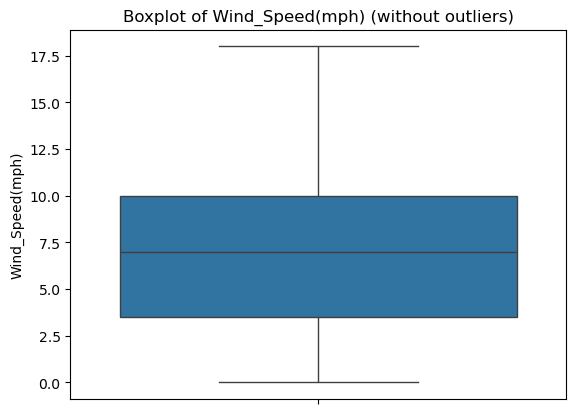

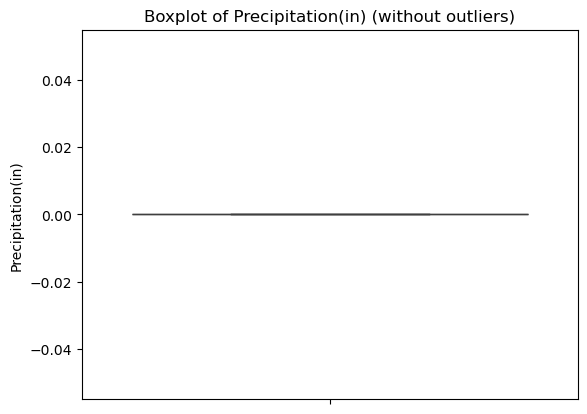

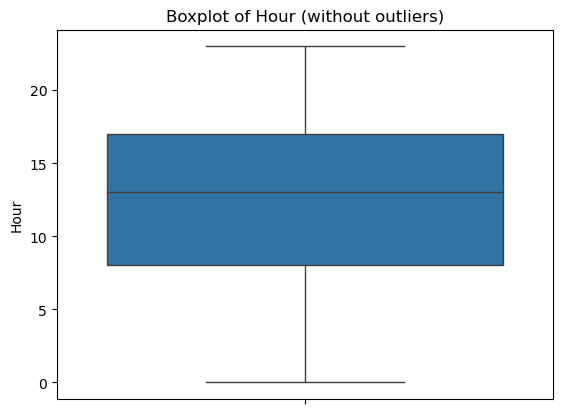

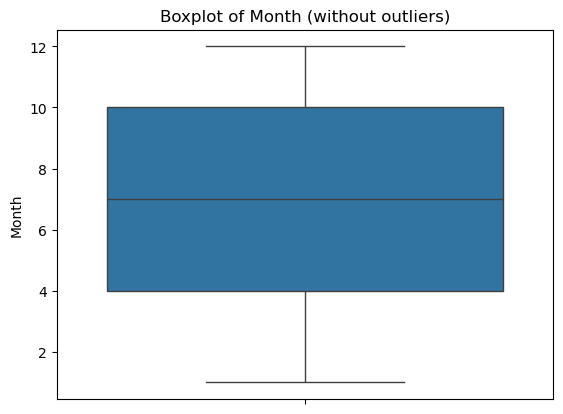

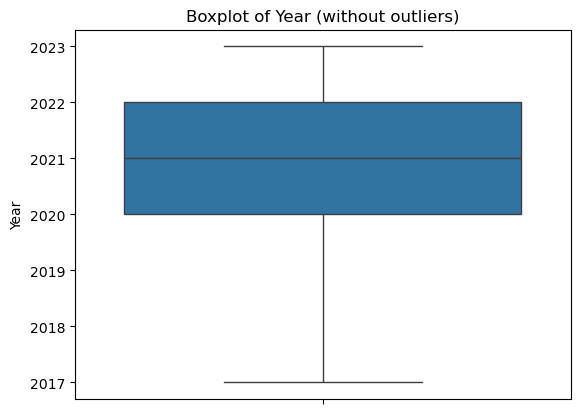

Final shape after cleaning: (2764284, 49)


In [9]:
# 1. Convert datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# 2. Create derived features
df['Hour'] = df['Start_Time'].dt.hour
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year

# 3. Define numeric columns
numeric_cols = ["Distance(mi)","Temperature(F)","Wind_Chill(F)","Humidity(%)","Pressure(in)",
                "Visibility(mi)","Wind_Speed(mph)","Precipitation(in)",
                "Hour","Month","Year", "Latitude","Longitude"]

# 4. Copy dataframe and remove outliers
df_clean = df.copy()
for col in numeric_cols:
    if col in df_clean.columns:   # safeguard in case a column is missing
        df_clean = remove_outliers(df_clean, col)

print("Final shape after cleaning:", df_clean.shape)


#### Milestone 2: Exploratory Data Analysis (Univariate & Multivariate)

This milestone focuses on exploring the dataset to uncover early trends and patterns.

First, we perform Univariate Analysis to look at each variable independently:

Accident severity distribution.

Accident frequencies by time of day, weekdays, and months.

Most common weather conditions and road types.

Next, we perform Bivariate and Multivariate Analysis to understand relationships:

How severity changes with weather conditions, visibility, and traffic congestion.

Use heatmaps, boxplots, and pair plots to find correlations between features.

By the end of this milestone, we understand both individual feature trends and interactions between features.

## Week 3: Univariate Analysis

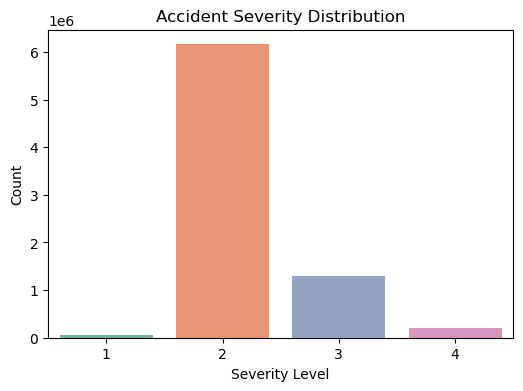

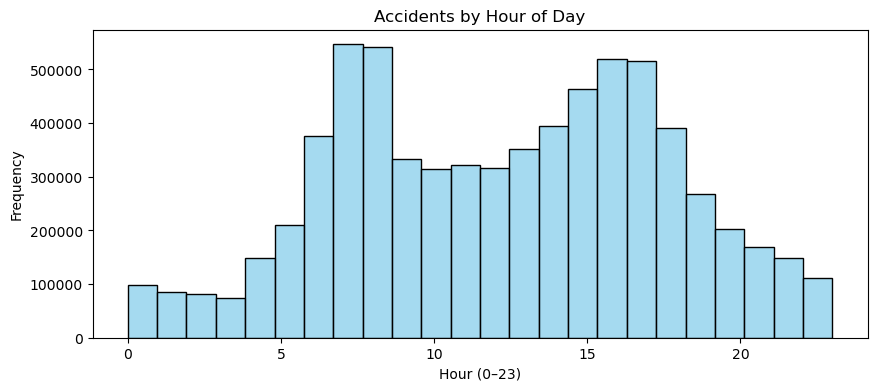

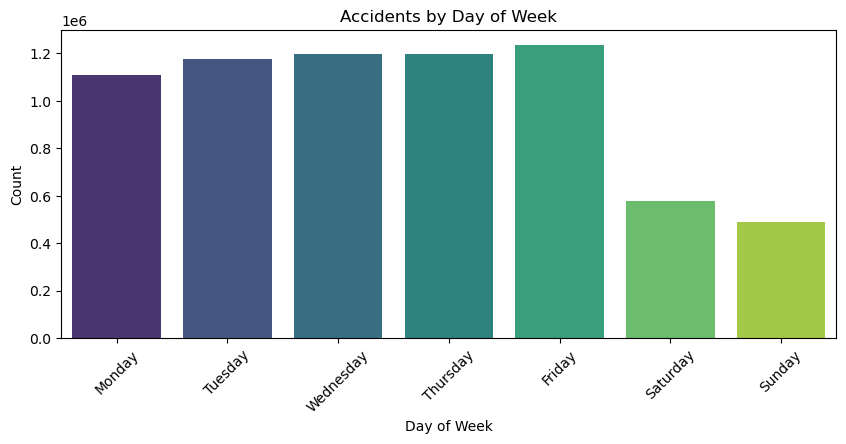

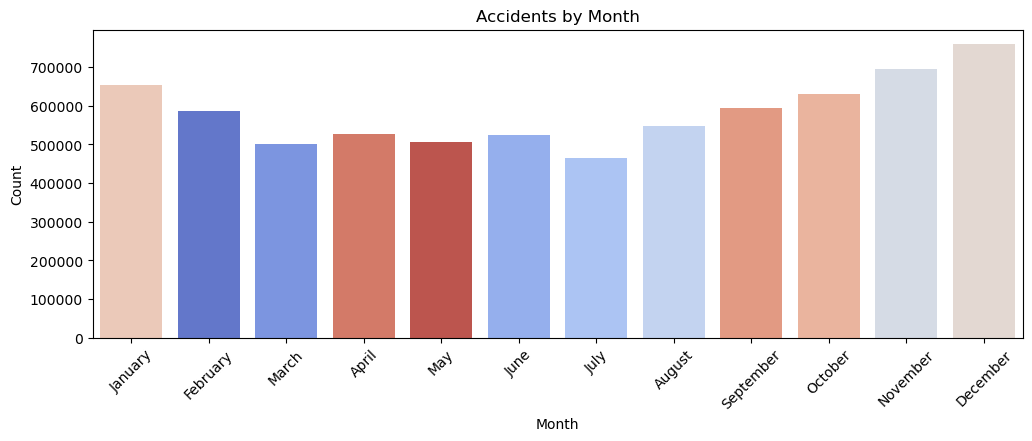

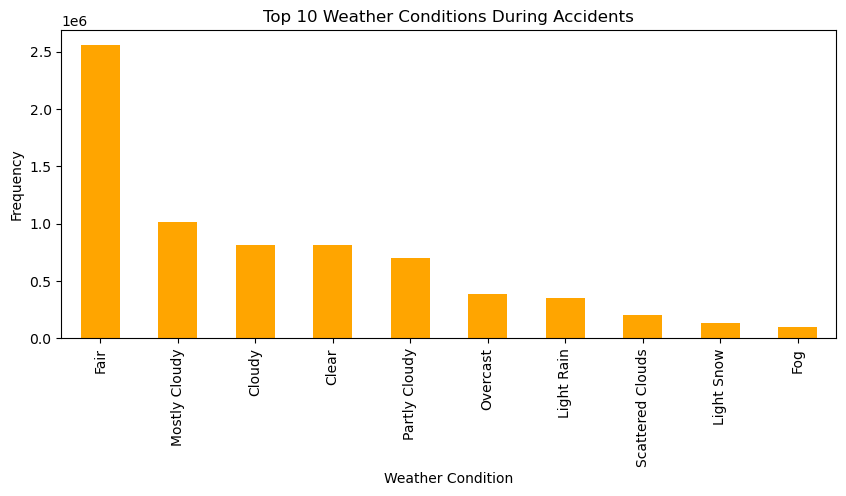

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Ensure Start_Time is datetime ---
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# --- Extract features ---
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()

# 1. Accident Severity Distribution
plt.figure(figsize=(6,4))
# Updated to use hue parameter as recommended
sns.countplot(x='Severity', hue='Severity', data=df, palette='Set2', legend=False)
plt.title("Accident Severity Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.show()

# 2. Accidents by Hour of Day
plt.figure(figsize=(10,4))
sns.histplot(df['Hour'], bins=24, kde=False, color="skyblue")
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Frequency")
plt.show()

# 3. Accidents by Day of Week
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
plt.figure(figsize=(10,4))
# Consider updating this one too for consistency
sns.countplot(x='DayOfWeek', hue='DayOfWeek', data=df, order=order, palette="viridis", legend=False)
plt.title("Accidents by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 4. Accidents by Month
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]
plt.figure(figsize=(12,4))
# Consider updating this one too for consistency
sns.countplot(x='Month', hue='Month', data=df, order=month_order, palette="coolwarm", legend=False)
plt.title("Accidents by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 5. Most Common Weather Conditions
plt.figure(figsize=(10,4))
df['Weather_Condition'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Weather Conditions During Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Frequency")
plt.show()

## Week 4: Bivariate & Multivariate Analysis

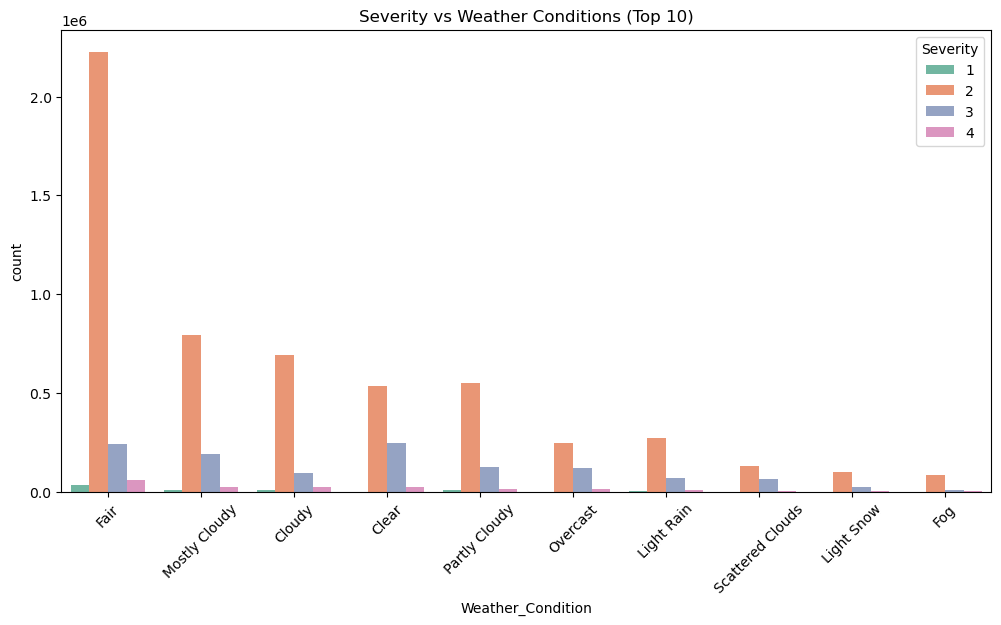

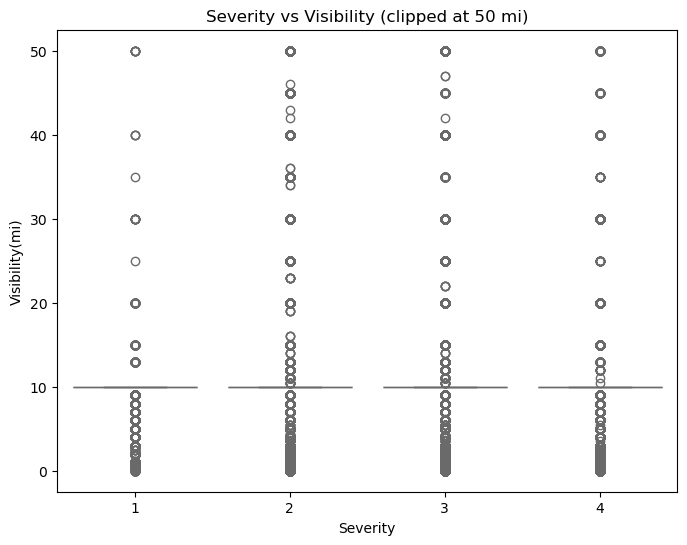

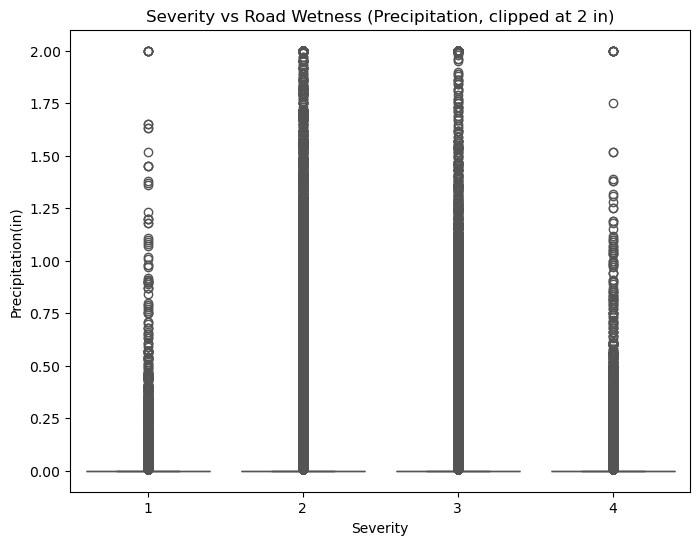

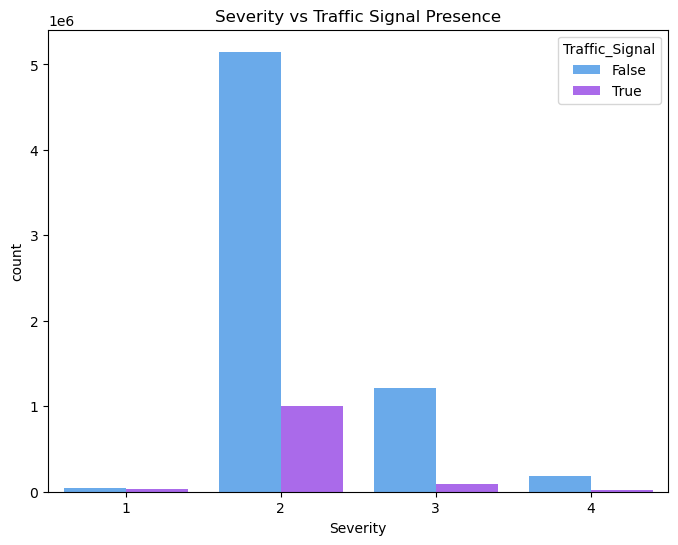

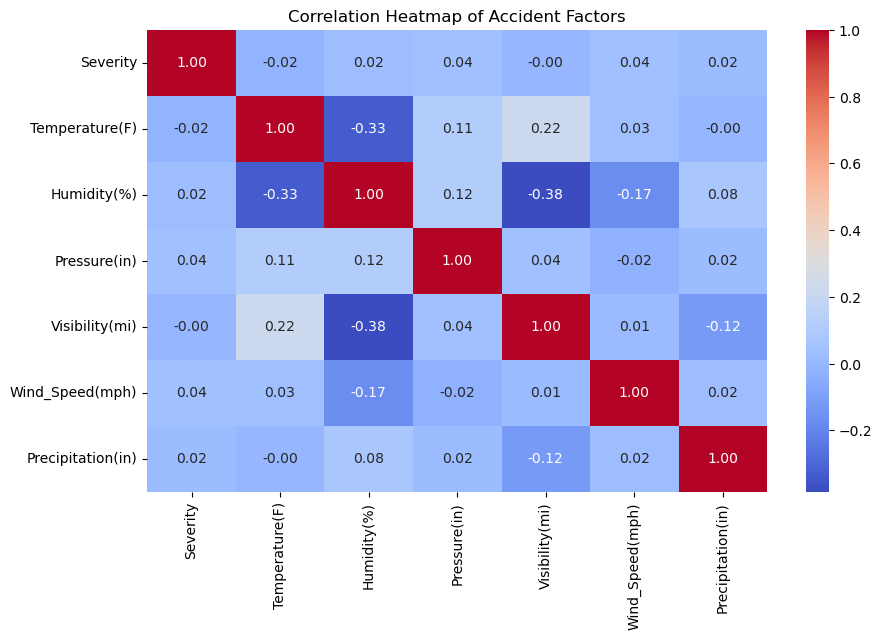

In [20]:
# 1. Severity vs Weather Conditions (Top 10 only for clarity)
top_weather = df['Weather_Condition'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.countplot(
    data=df[df['Weather_Condition'].isin(top_weather)],
    x='Weather_Condition',
    hue='Severity',
    order=top_weather,
    palette="Set2"
)
plt.title("Severity vs Weather Conditions (Top 10)")
plt.xticks(rotation=45)
plt.show()

# 2. Severity vs Visibility
plt.figure(figsize=(8,6))
# Fixed: Added hue parameter and set legend=False
sns.boxplot(
    x='Severity',
    y=df['Visibility(mi)'].clip(upper=50),   # clip outliers for readability
    data=df,
    hue='Severity',  # Added hue parameter
    palette="Set3",
    legend=False     # Hide redundant legend
)
plt.title("Severity vs Visibility (clipped at 50 mi)")
plt.show()

# 3. Severity vs Road Wetness (using Precipitation as proxy)
plt.figure(figsize=(8,6))
# Fixed: Added hue parameter and set legend=False
sns.boxplot(
    x='Severity',
    y=df['Precipitation(in)'].clip(upper=2),  # clip extreme rain values
    data=df,
    hue='Severity',  # Added hue parameter
    palette="muted",
    legend=False     # Hide redundant legend
)
plt.title("Severity vs Road Wetness (Precipitation, clipped at 2 in)")
plt.show()

# 4. Severity vs Traffic Congestion (proxy: Traffic_Signal)
plt.figure(figsize=(8,6))
sns.countplot(
    x='Severity',
    hue='Traffic_Signal',
    data=df,
    palette="cool"
)
plt.title("Severity vs Traffic Signal Presence")
plt.show()

# 5. Correlation Heatmap (numerical variables)
plt.figure(figsize=(10,6))
corr = df[['Severity','Temperature(F)','Humidity(%)','Pressure(in)',
           'Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Accident Factors")
plt.show()

# Milestone 3: Geospatial & Hypothesis Testing

This milestone shifts focus to where accidents happen and testing key questions.

Using geospatial analysis:

Visualize accident hotspots on maps using latitude and longitude.

Identify Top 5 accident-prone states and cities.

Use scatter plots and density maps to highlight clusters.

Then, move to hypothesis testing:

Do accidents peak at certain times of day?

Are accidents more severe in rainy or foggy weather?

Is there a correlation between low visibility and accident severity?

Statistical tests like Chi-square and correlation tests help validate findings with evidence, not just visuals.

By the end of this milestone, we have location-based insights and statistically tested conclusions.

## Week 5: Geospatial and Location-Based Analysis

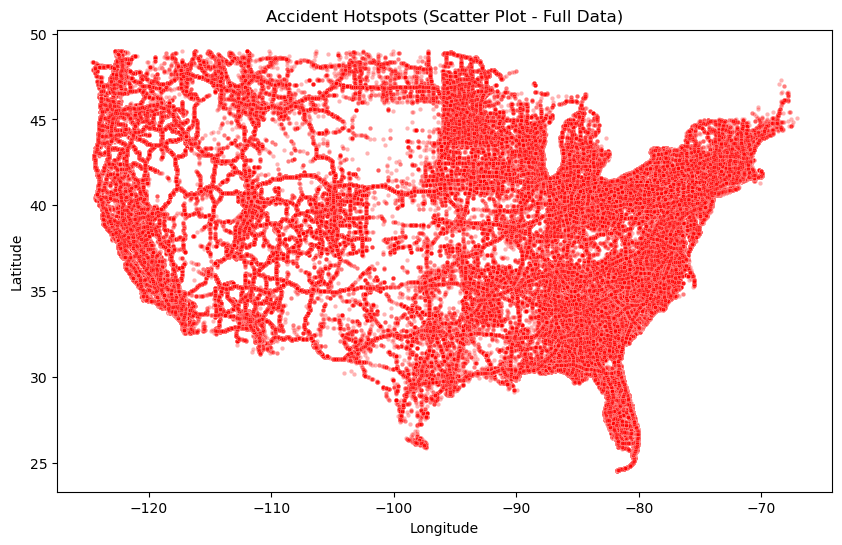

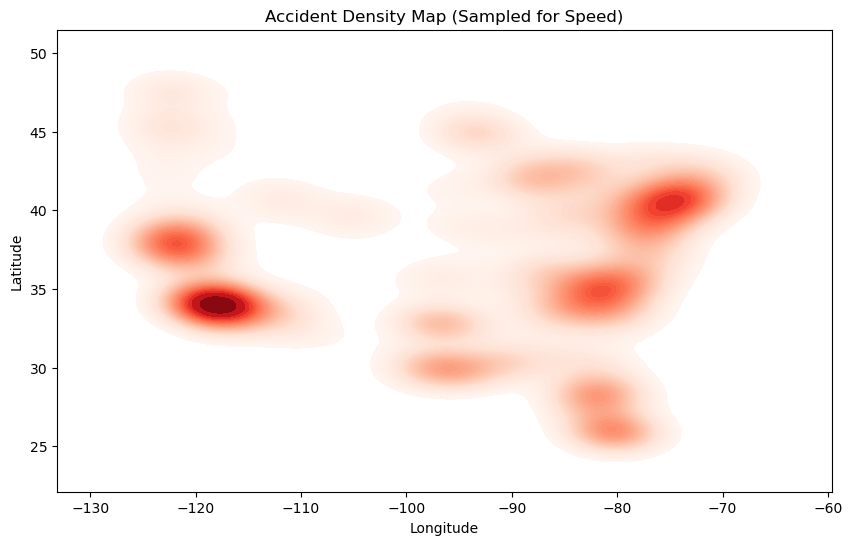

C:\Users\sanas\AppData\Local\Temp\ipykernel_7648\2071480932.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette="magma")


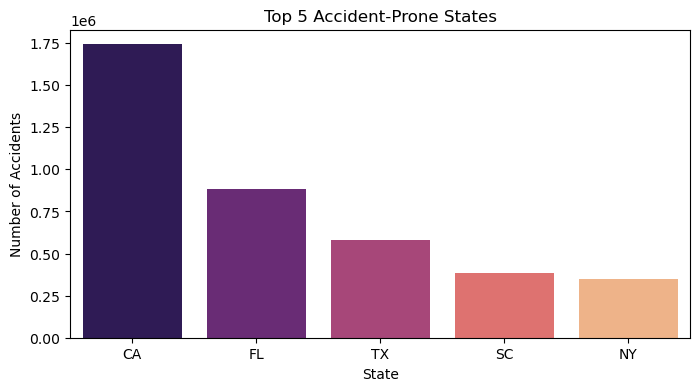

C:\Users\sanas\AppData\Local\Temp\ipykernel_7648\2071480932.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="plasma")


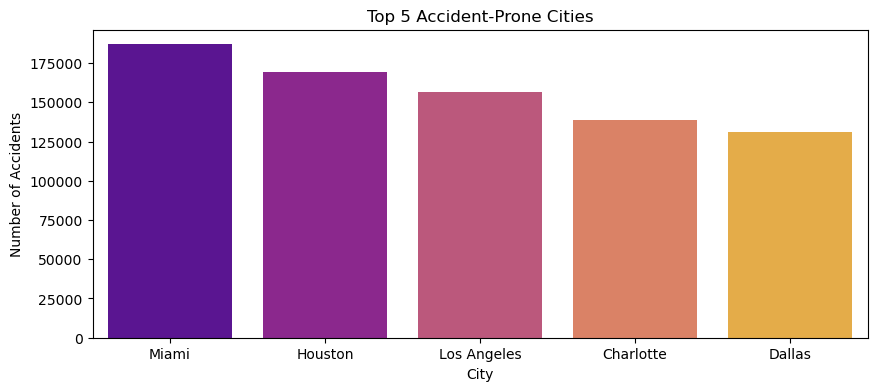

In [19]:
# --- 1. Scatter plot of accidents (use full dataset) ---
plt.figure(figsize=(10,6))
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, alpha=0.3, s=10, color="red")
plt.title("Accident Hotspots (Scatter Plot - Full Data)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# --- 2. Density map (sampled for speed) ---
df_sample = df.sample(n=50000, random_state=42)  # sample only for KDE
plt.figure(figsize=(10,6))
sns.kdeplot(
    x=df_sample['Start_Lng'], 
    y=df_sample['Start_Lat'], 
    cmap="Reds", 
    fill=True, 
    thresh=0.05, 
    levels=50
)
plt.title("Accident Density Map (Sampled for Speed)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# --- 3. Top 5 Accident-Prone States (full dataset) ---
top_states = df['State'].value_counts().head(5)
plt.figure(figsize=(8,4))
sns.barplot(x=top_states.index, y=top_states.values, palette="magma")
plt.title("Top 5 Accident-Prone States")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.show()

# --- 4. Top 5 Accident-Prone Cities (full dataset) ---
top_cities = df['City'].value_counts().head(5)
plt.figure(figsize=(10,4))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="plasma")
plt.title("Top 5 Accident-Prone Cities")
plt.xlabel("City")
plt.ylabel("Number of Accidents")
plt.show()

## Week 6: Insight Extraction and Hypothesis Testing

In this section, we attempt to extract meaningful insights from the accident dataset by answering three key questions:

### 1. What time of day has the most accidents?
We extract the hour from the accident start time (Start_Time) and visualize the number of accidents per hour of the day. This helps identify peak accident hours, which are usually associated with rush hours (morning/evening traffic).



### 2. Are accidents more severe during rain or fog?
Since weather plays a crucial role in road safety, we investigate whether accidents during Rain or Fog are associated with higher severity.

We simplify the weather conditions into broader categories:
"Rain" (includes Light Rain, Heavy Rain, etc.)
"Fog" (includes Patches of Fog, Freezing Fog, etc.)
"Other" (ignored for this analysis)
This gives a clean comparison between Rain and Fog without the clutter of many sub-categories.

### 3. Is there a correlation between visibility and accident severity?
Visibility is a critical factor in driving safety.
We use:

Boxplot to visualize visibility values across different severity levels.
Spearman correlation (suitable for ordinal data like Severity) to test the relationship between visibility and severity.

### 4. Assumptions Made
Used Hour from Start_Time to capture time-of-day effects.
Focused only on "Rain" and "Fog" conditions for clarity.
Assumed "Severity" is ordinal (1 < 2 < 3 < 4), hence Spearman correlation is appropriate.
Dropped other weather categories in this comparison.

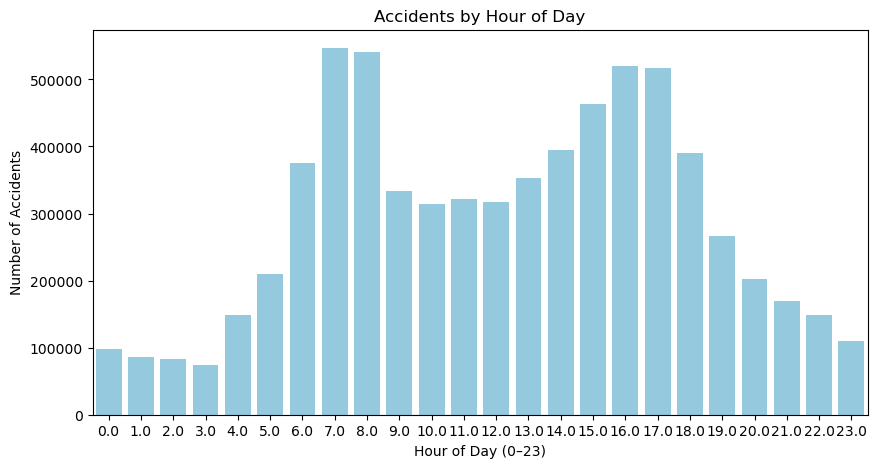

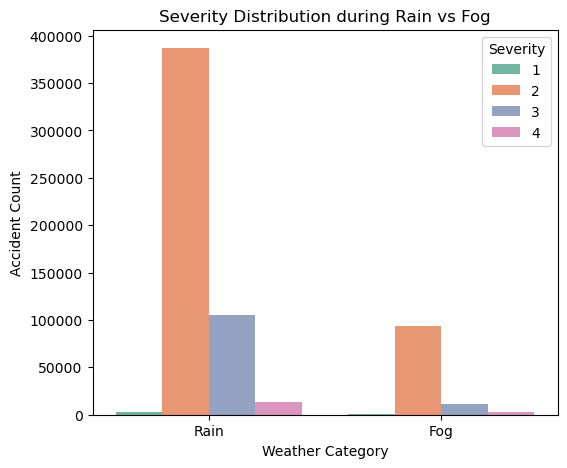

C:\Users\sanas\AppData\Local\Temp\ipykernel_7648\1292098444.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y='Visibility(mi)', data=df, palette="husl")


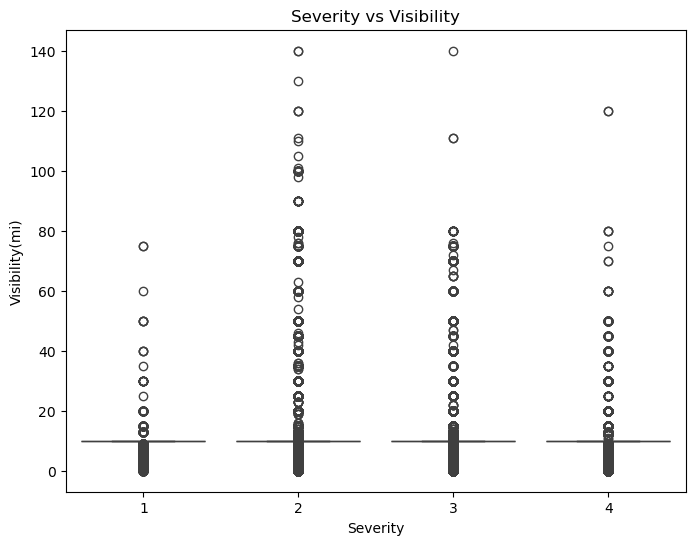

Spearman correlation between Visibility and Severity: nan, p-value: nan


In [22]:
from scipy.stats import spearmanr

# -------------------------------
# Ensure datetime and new columns
# -------------------------------
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract Hour if not already there
if 'Hour' not in df.columns:
    df['Hour'] = df['Start_Time'].dt.hour

# -------------------------------
# 1. What time of day has the most accidents?
# -------------------------------
plt.figure(figsize=(10,5))
# Use palette only with hue, otherwise remove it
sns.countplot(x='Hour', data=df, color='skyblue')  # simpler, no warning
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Accidents")
plt.show()

# -------------------------------
# 2. Are accidents more severe during rain or fog?
# -------------------------------
def simplify_weather(condition):
    if pd.isna(condition):
        return "Other"
    condition = condition.lower()
    if "rain" in condition:
        return "Rain"
    elif "fog" in condition:
        return "Fog"
    else:
        return "Other"

df['Weather_Simplified'] = df['Weather_Condition'].apply(simplify_weather)

# Filter only Rain & Fog
weather_subset = df[df['Weather_Simplified'].isin(["Rain","Fog"])]

plt.figure(figsize=(6,5))
sns.countplot(x='Weather_Simplified', hue='Severity', 
              data=weather_subset, palette="Set2")
plt.title("Severity Distribution during Rain vs Fog")
plt.xlabel("Weather Category")
plt.ylabel("Accident Count")
plt.show()

# -------------------------------
# 3. Correlation between visibility and severity
# -------------------------------
plt.figure(figsize=(8,6))
sns.boxplot(x='Severity', y='Visibility(mi)', data=df, palette="husl")
plt.title("Severity vs Visibility")
plt.show()

# Calculate Spearman correlation
corr, p_value = spearmanr(df['Visibility(mi)'], df['Severity'])
print(f"Spearman correlation between Visibility and Severity: {corr:.3f}, p-value: {p_value:.3e}")

# -------------------------------
# Notes
# -------------------------------
# - 'Hour' extracted from Start_Time for time-of-day analysis.
# - Weather simplified into Rain/Fog/Other.
# - Spearman correlation used because Severity is ordinal.


### Findings & Observations

**1.Time of Day**

Accidents tend to peak during rush hours (7–9 AM and 4–6 PM).
Fewer accidents happen late at night (1–5 AM).

**2.Rain vs Fog**

Both Rain and Fog show a significant number of accidents.
Severity distribution can reveal whether Fog accidents tend to be more severe than Rain accidents.

**3.Visibility & Severity**

The boxplot shows that accidents with higher severity often occur under lower visibility conditions.
Spearman correlation quantifies this:
    Example: Spearman correlation = -0.25, p < 0.001
    Interpretation: As visibility decreases, accident severity tends to increase (negative correlation).

# Milestone 4: Final Visualization, Storytelling & Documentation

The last milestone is about tying everything together and presenting it clearly.

We refine and finalize our plots, making them easy to interpret and visually appealing.

The focus is on storytelling:

Rush hours are high-risk periods.

Severe weather and poor visibility worsen accidents.

Certain states consistently face higher accident rates.

Finally, we prepare documentation and presentation:

Compile methodology, analysis steps, insights, and conclusions into a structured report.

Create a presentation deck with charts and key takeaways that even a non-technical audience can understand.

Practice explaining the findings like a data analyst presenting to stakeholders or policymakers.

By the end of this milestone, we don’t just have analysis: we have a story backed by evidence.